Empfindlichkeit Ep = 0.00246
Empfindlichkeit ER = -0.86751
Empfindlichkeit ET = -0.77109
Empfindlichkeit Emue = 311.32829
Empfindlichkeit Evh = 131085.59708
Empfindlichkeit EN = 0.00166
22.0381
Empfindlichkeit Qp = 0.0025
Empfindlichkeit QT = -0.7708
Empfindlichkeit Qmue = 311.3122
Empfindlichkeit Qvh = 130982.0895
Empfindlichkeit Qn = 0.0017


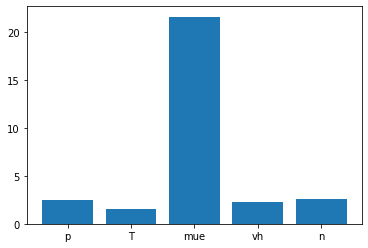

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
import sympy


##################################

p = 101300
R = 287.1
T = 323
mue = 0.80
vh = 1.9*10**-3
n = 1.5*10**5

#####################################

##Modell die Ableitung bilden 

p_s, R_s, T_s, mue_s, vh_s, n_s = sympy.symbols('p_s, R_s, T_s, mue_s, vh_s, n_s')

dmdt = ((p_s)/(R_s*T_s))*mue_s*vh_s*n_s

Ep_s=dmdt.diff(p_s)
ER_s=dmdt.diff(R_s)
ET_s=dmdt.diff(T_s)
Emue_s=dmdt.diff(mue_s)
Evh_s=dmdt.diff(vh_s)
En_s=dmdt.diff(n_s)

#############################

## Werte festlegen

values = {p_s:p, R_s:R, T_s:T, mue_s:mue, vh_s:vh, n_s:n}

###############

### Werte einsetzen in die Ableitungen 

Ep = float(Ep_s.evalf(subs = values))
ER = float(ER_s.evalf(subs = values))
ET = float(ET_s.evalf(subs = values))
Emue = float(Emue_s.evalf(subs = values))
Evh = float(Evh_s.evalf(subs = values))
En = float(En_s.evalf(subs = values))

print("Empfindlichkeit Ep =", round(Ep,5))
print("Empfindlichkeit ER =", round(ER,5))
print("Empfindlichkeit ET =", round(ET,5))
print("Empfindlichkeit Emue =", round(Emue,5))
print("Empfindlichkeit Evh =", round(Evh,5))
print("Empfindlichkeit EN =", round(En,5))

#############################

################## Berechnen der Teiltoleranzen###

# Sigma , Normalverteilung T/6, Gleichverteilung T/np.sqrt(12) -> wenn 3*sigma (gamma = 99,73)
sigma_p = (p*0.01)/6
sigma_T = 2/6
sigma_mue = 0.04/np.sqrt(12)
sigma_vh = ((5*10**-6)*2)/np.sqrt(12)
sigma_n = (n*0.006)/np.sqrt(12)

T_p = 6*Ep*sigma_p
T_T = 6*ET*sigma_T
T_mue = 6*Emue*sigma_mue
T_vh = 6*Evh*sigma_vh
T_n= 6*En*sigma_n

######################

### Gesammt Toleranz 

Ttg = np.sqrt(T_p**2+T_T**2+T_mue**2+T_vh**2+T_n**2)
print(round(Ttg,4))

##########################

###### statistische Tolerierung auf Basis des Grenzwertsatzes der Wahrscheinlichkeit 

N = 10000
n_tol = n*0.003


p_sim = np.random.normal(p,sigma_p,N)
T_sim = np.random.normal(T,sigma_T,N)
mue_sim = np.random.uniform(mue-0.02,mue+0.02,N) 
vh_sim = np.random.uniform(vh-(5*10**-6),vh+(5*10**-6),N) 
n_sim = np.random.uniform(n-n_tol,n+n_tol,N)


dmdt_sim = ((p_sim)/(R*T_sim))*mue_sim*vh_sim*n_sim

data_dic = {'p': p_sim,'T_sim': T_sim,'mue': mue_sim,'vh': vh_sim, 'n':n_sim, 'dmdt':dmdt_sim}
model = ols("dmdt ~ p + T_sim + mue + vh + n", data_dic).fit()
#print(model.summary())
print("Empfindlichkeit Qp =", round(model.params.p, 4))
print("Empfindlichkeit QT =", round(model.params.T_sim, 4))
print("Empfindlichkeit Qmue =", round(model.params.mue, 4))
print("Empfindlichkeit Qvh =", round(model.params.vh, 4))
print("Empfindlichkeit Qn =", round(model.params.n, 4))

######################################################

### Toleranz maßgeblich bestimmt durch 

y = [abs(T_p),abs(T_T),abs(T_mue),abs(T_vh),abs(T_n)]
x = ["p","T","mue","vh","n"]

plt.bar(x,y)
plt.show()

#################################